In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Automobile/Tasla_Stock_Updated_V2.csv')

In [3]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [4]:
data.set_index('Date', inplace=True)

In [5]:
data.head(20)

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500
2015-01-09,5,13.928000,13.998667,13.664000,13.777333,70024500
2015-01-12,6,13.536667,13.631333,13.283333,13.480667,89254500
2015-01-13,7,13.554667,13.840667,13.394000,13.616667,67159500
2015-01-14,8,12.388667,13.013333,12.333333,12.846000,173278500


This is Tesla Stock Price from 2015-01-02 to 2024-01-16

In [6]:
pd.to_datetime(data.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16'],
              dtype='datetime64[ns]', name='Date', length=2274, freq=None)

In [7]:
#data = data.sort_values(by='Date')

In [10]:
data.drop(['Unnamed: 0'],axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...
2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600


In [12]:
data.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 2015-01-02 to 2024-01-16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Open        2274 non-null   float64
 2   High        2274 non-null   float64
 3   Low         2274 non-null   float64
 4   Close       2274 non-null   float64
 5   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 124.4+ KB


# Data Visualization

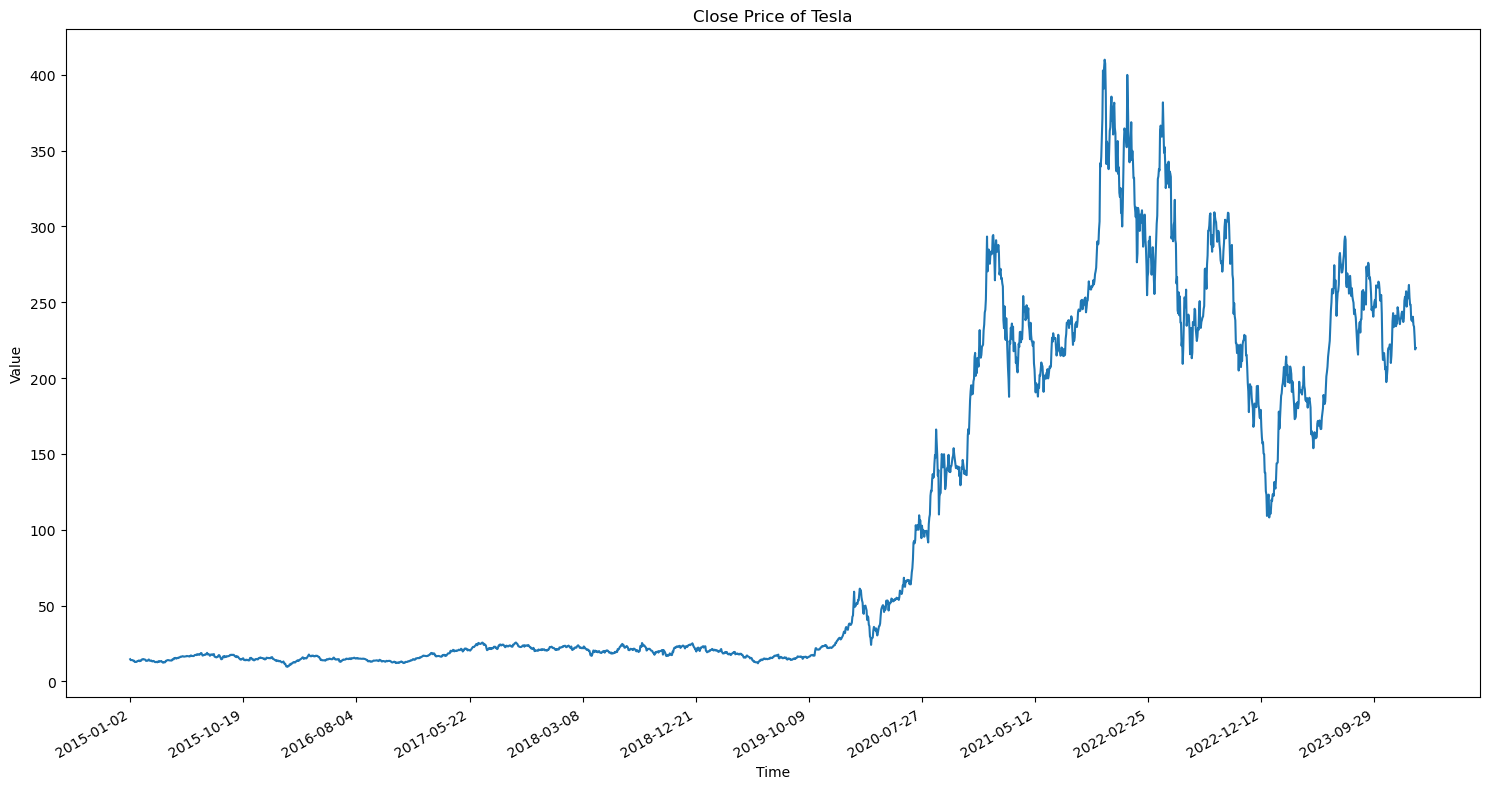

In [14]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Close'], label='Adj Close')
ax.set_title('Close Price of Tesla')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,2274,200))
pt.tight_layout()

The stock starts to has an increase trend at around 2020 until Q3 of 2021. 

https://time.com/6243613/why-tesla-stock-down/

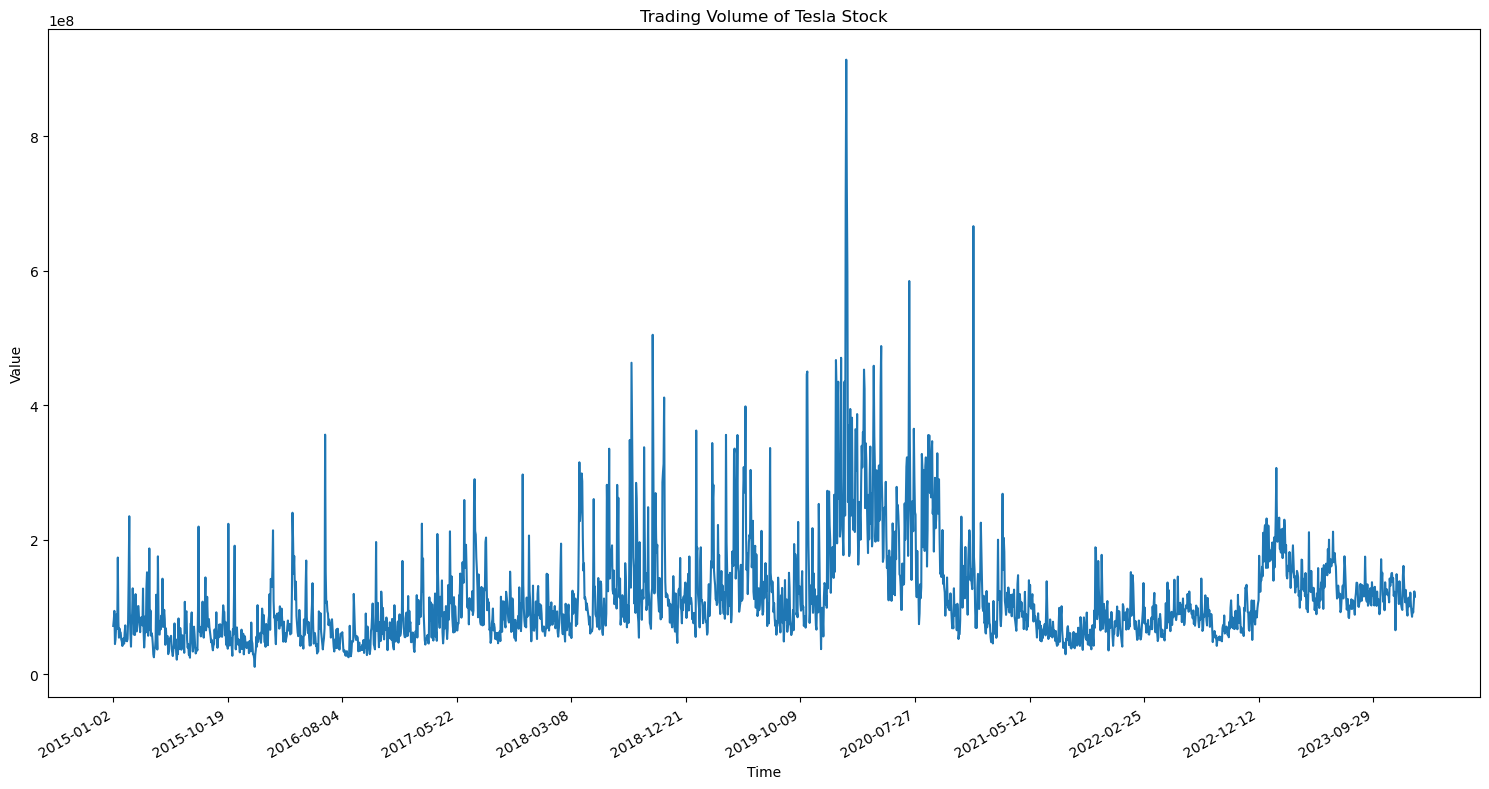

In [16]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Volume'], label='Volume')
ax.set_title('Trading Volume of Tesla Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,2274,200))
pt.tight_layout()

It appears that the traders are holding onto their stock when the market starts to decrease

R-Value:  0.8222156400996747
P-Value:  0.0
Std Err:  0.0020192748121534874


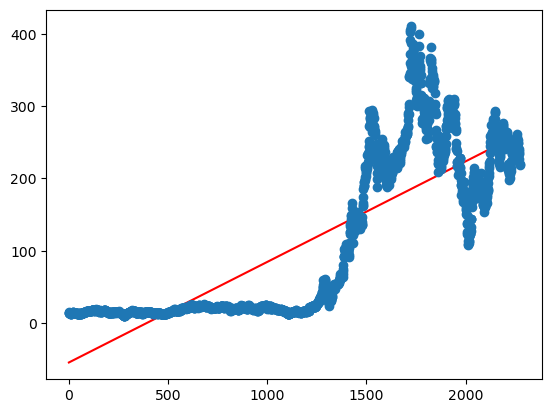

In [17]:
xi = np.arange(0,2274)
y = data['Close']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


The Tesla Stock closing price is linear with time.

In [18]:
std_dev = data['Close'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['Close'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 111.03201925347982
 Mean: 103.46179386095301
 Coefficient Variance: 107.31692841388463 %


# Moving Average Window

In [19]:
data['Moving Average (20)'] = data['Close'].rolling(window=20).mean()
data['Moving Average (100)'] = data['Close'].rolling(window=100).mean()

In [20]:
data.head(20)

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100)
Date,,,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500,NaN,NaN
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500,NaN,NaN
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000,NaN,NaN
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500,NaN,NaN
2015-01-09,5,13.928000,13.998667,13.664000,13.777333,70024500,NaN,NaN
2015-01-12,6,13.536667,13.631333,13.283333,13.480667,89254500,NaN,NaN
2015-01-13,7,13.554667,13.840667,13.394000,13.616667,67159500,NaN,NaN
2015-01-14,8,12.388667,13.013333,12.333333,12.846000,173278500,NaN,NaN


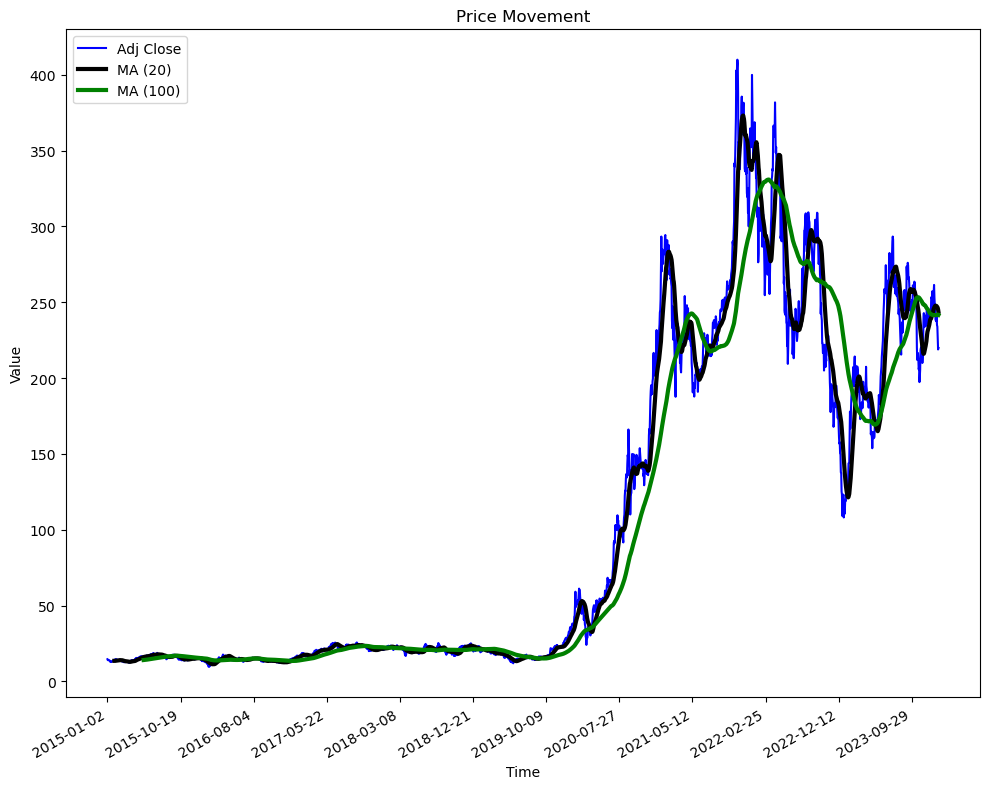

In [27]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], 'b-', label='Adj Close')
ax.plot(data['Moving Average (20)'], 'k-',label='MA (20)', linewidth=3)
ax.plot(data['Moving Average (100)'], 'g-',label='MA (100)', linewidth=3)
ax.set_title('Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2274, 200))
fig.autofmt_xdate()
pt.tight_layout()

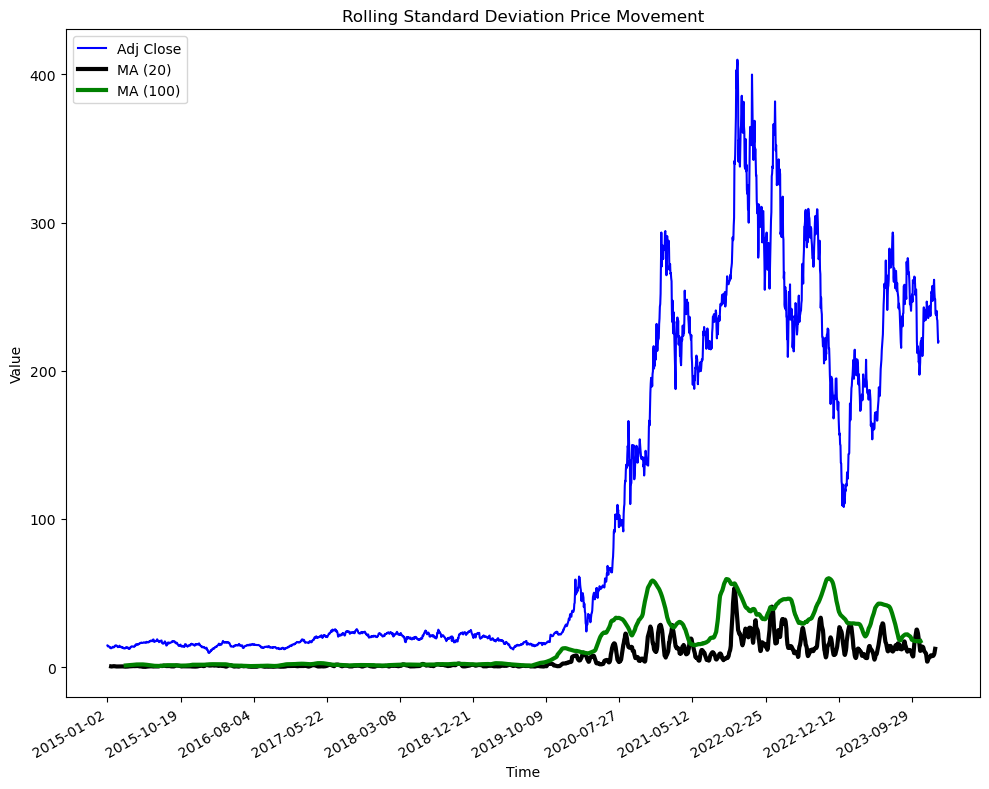

In [29]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], 'b-', label='Adj Close')
ax.plot(data['Close'].rolling(window=20, center=True).std(), 'k-', label='MA (20)', linewidth=3)
ax.plot(data['Close'].rolling(window=100, center=True).std(), 'g-',label='MA (100)', linewidth=3)
ax.set_title('Rolling Standard Deviation Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2274, 200))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant at the beginning and starts to increase towards the end

pct_change() in this case is basically calculating the percentage change of the current element from previous element. In this case, Adj Close price the current day and the previous day. 

In [30]:
data['Daily Return'] = data['Close'].pct_change()
data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN,NaN
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500,NaN,NaN,-0.042041
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500,NaN,NaN,0.005664
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000,NaN,NaN,-0.001562
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500,NaN,NaN,-0.001564


In [31]:
data.tail()

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2024-01-09,2269,238.110001,238.960007,232.039993,234.960007,96705700,247.073998,241.650899,-0.022832
2024-01-10,2270,235.100006,235.500000,231.289993,233.940002,91628500,246.783998,241.798099,-0.004341
2024-01-11,2271,230.570007,230.929993,225.369995,227.220001,105873600,246.294498,241.915399,-0.028725
2024-01-12,2272,220.080002,225.339996,217.149994,218.889999,122889000,245.274499,241.791499,-0.036661
2024-01-16,2273,215.100006,223.490005,212.180099,219.910004,115064708,243.717499,241.658699,0.004660


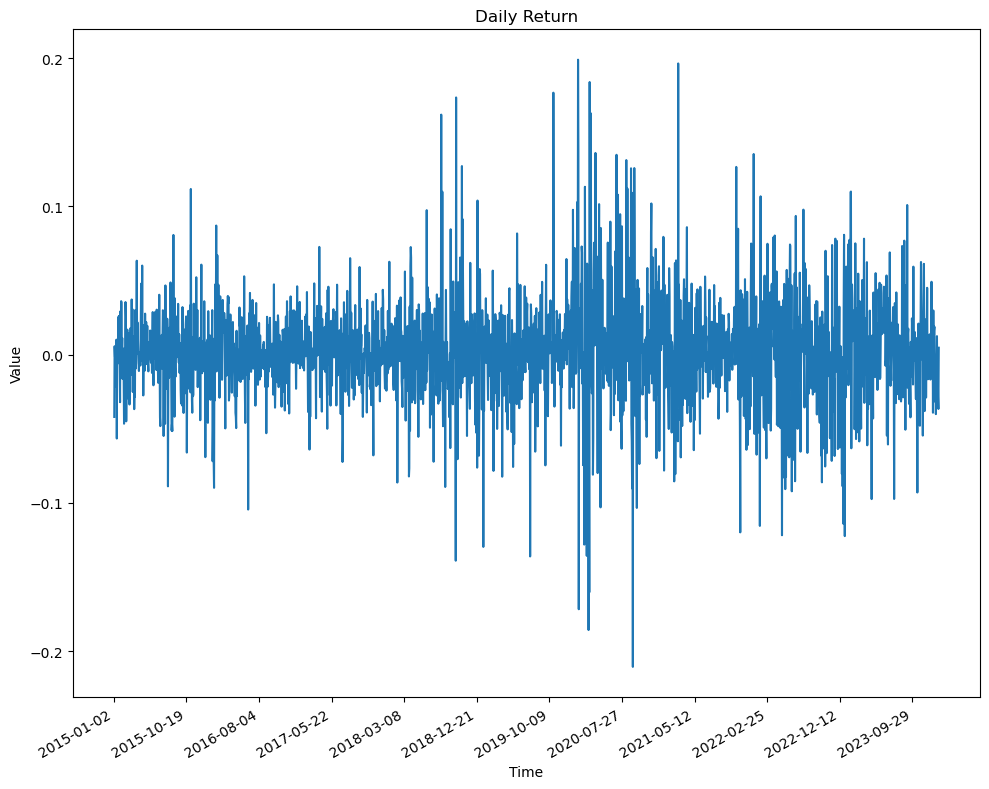

In [32]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Daily Return'], label='Daily Return')
ax.set_title('Daily Return')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
pt.xticks(np.arange(0,2274,200))
fig.autofmt_xdate()
pt.tight_layout()

# XGBoosting For Feature Importance

In [41]:
Features = ['Open', 'Low', 'High', 'Volume', 'Daily Return']
target = ['Close']

In [42]:
train = data.loc[data.index < '2023-01-16']
test = data.loc[data.index > '2023-01-16']

In [43]:
test.shape

(251, 9)

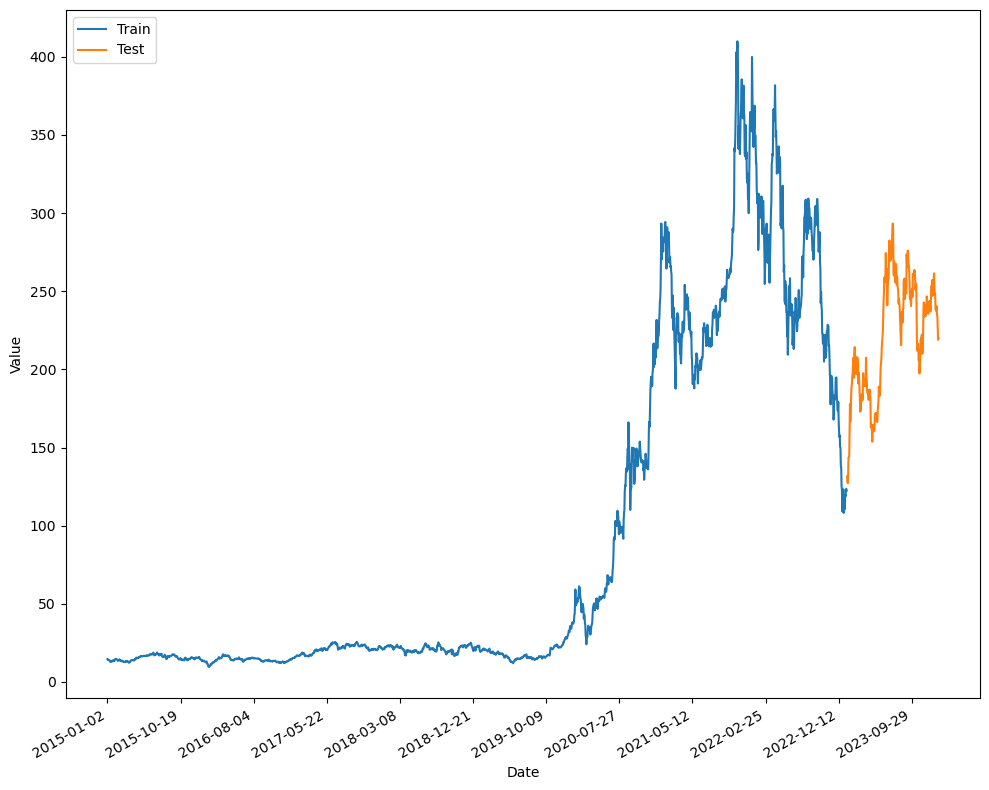

In [44]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(train[target], label='Train')
ax.plot(test[target], label='Test')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2274,200))
fig.autofmt_xdate()
pt.tight_layout()

In [45]:
X_train = train[Features]
y_train = train[target]

X_test = test[Features]
y_test = test[target]

In [53]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.03)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:105.09665	validation_1-rmse:133.82311
[100]	validation_0-rmse:5.59161	validation_1-rmse:7.20900
[200]	validation_0-rmse:1.08663	validation_1-rmse:3.12949
[268]	validation_0-rmse:0.82766	validation_1-rmse:3.10207


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
feature_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['Importances'])

<Axes: title={'center': 'Feature Importance'}>

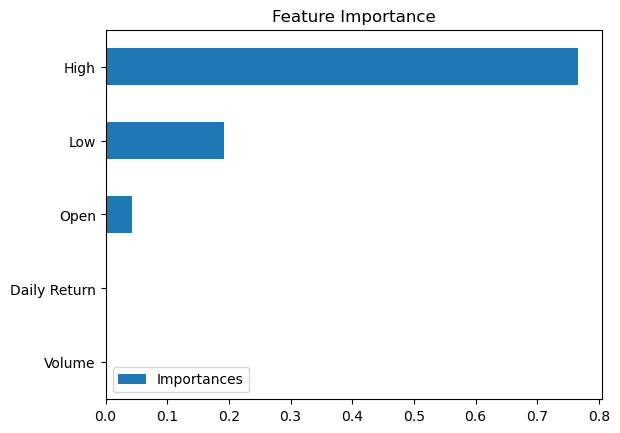

In [55]:
feature_importance.sort_values('Importances').plot(kind='barh', title='Feature Importance')

In [56]:
feature_importance

,Importances
Open,0.042581
Low,0.191407
High,0.765842
Volume,0.000048
Daily Return,0.000122


Only the highest price of the day is relevant to our Closing Price

# Stationary Check

In [57]:
adf_results = adfuller(data['Close'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: -1.2114232360565207
 P-Value: 0.6686625213787416


In [58]:
adf_results = adfuller(np.diff(data['Close'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: -9.523146432144008
 P-Value: 3.0268790694074695e-16
 The time series is stationary


In [60]:
data_diff = np.diff(data['Close'], n=1)

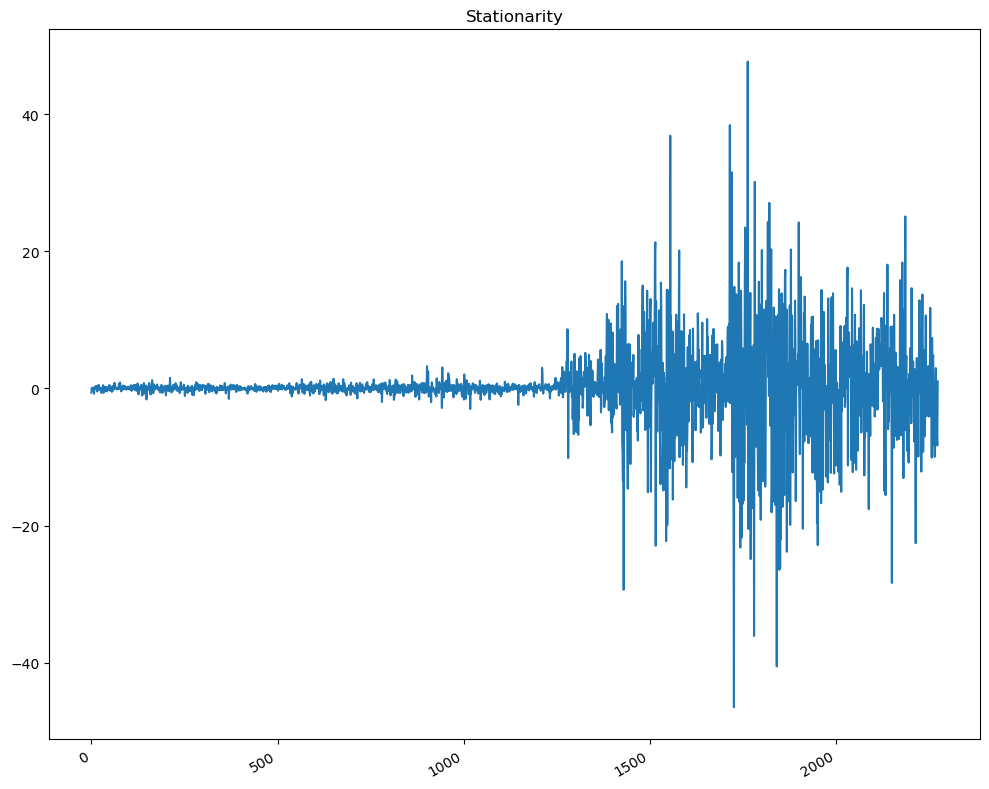

In [62]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

First-Order integration. As expected, at around 2020 the tesla stock prices starts to increase significantly causing the market to be volatile, resulting in increasing variance.

<function plot_acf at 0x00000174A74A4860>


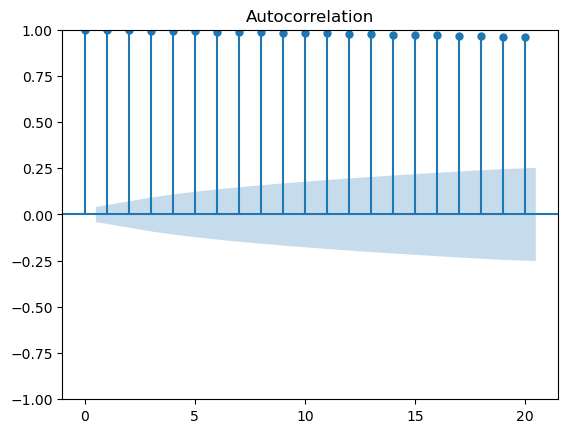

In [63]:
plot_acf(data['Close'], lags=20)
print(plot_acf)

<function plot_pacf at 0x00000174A74A4720>


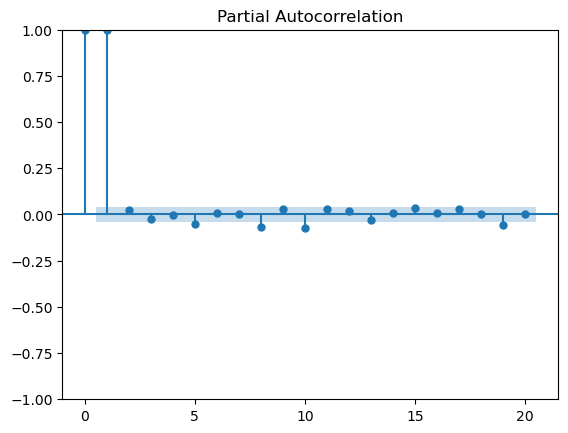

In [64]:
plot_pacf(data['Close'], lags=20)
print(plot_pacf)

# Data Preprocessing

In [65]:
copy_data = data.copy()

In [66]:
copy_data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000,NaN,NaN,NaN
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500,NaN,NaN,-0.042041
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500,NaN,NaN,0.005664
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000,NaN,NaN,-0.001562
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500,NaN,NaN,-0.001564


In [67]:
copy_data.drop(['Unnamed: 0', 
           'Open', 
           'Low',
            'Volume',
           'Moving Average (20)', 
           'Moving Average (100)', 
           'Daily Return'], axis=1)

,High,Close
Date,,
2015-01-02,14.883333,14.620667
2015-01-05,14.433333,14.006000
2015-01-06,14.280000,14.085333
2015-01-07,14.318667,14.063333
2015-01-08,14.253333,14.041333
...,...,...
2024-01-09,238.960007,234.960007
2024-01-10,235.500000,233.940002
2024-01-11,230.929993,227.220001


In [68]:
scaler = StandardScaler()
scaler.fit(copy_data)
copy_data = scaler.transform(copy_data)

In [69]:
copy_data

array([[-1.7312893 , -0.7977171 , -0.80020597, ...,         nan,
                nan,         nan],
       [-1.72976595, -0.80270907, -0.80416789, ...,         nan,
                nan, -1.23591859],
       [-1.7282426 , -0.80540305, -0.80551788, ...,         nan,
                nan,  0.1082624 ],
       ...,
       [ 1.7282426 ,  1.14368008,  1.10192947, ...,  1.29469563,
         1.2883483 , -0.86072472],
       [ 1.72976595,  1.04927056,  1.05271358, ...,  1.28546192,
         1.28720395, -1.08431297],
       [ 1.7312893 ,  1.00445085,  1.03642574, ...,  1.27136693,
         1.2859774 ,  0.07996325]])

In [70]:
imputer = SimpleImputer(strategy='mean')
copy_data = imputer.fit_transform(copy_data)

In [71]:
copy_data

array([[-1.73128930e+00, -7.97717095e-01, -8.00205965e-01, ...,
        -5.04154491e-17,  0.00000000e+00, -1.87560775e-17],
       [-1.72976595e+00, -8.02709066e-01, -8.04167890e-01, ...,
        -5.04154491e-17,  0.00000000e+00, -1.23591859e+00],
       [-1.72824260e+00, -8.05403053e-01, -8.05517883e-01, ...,
        -5.04154491e-17,  0.00000000e+00,  1.08262405e-01],
       ...,
       [ 1.72824260e+00,  1.14368008e+00,  1.10192947e+00, ...,
         1.29469563e+00,  1.28834830e+00, -8.60724720e-01],
       [ 1.72976595e+00,  1.04927056e+00,  1.05271358e+00, ...,
         1.28546192e+00,  1.28720395e+00, -1.08431297e+00],
       [ 1.73128930e+00,  1.00445085e+00,  1.03642574e+00, ...,
         1.27136693e+00,  1.28597740e+00,  7.99632494e-02]])

In [72]:
pca = PCA(n_components=1)
copy_data = pca.fit_transform(copy_data)

In [73]:
copy_data

array([[-1.81421451],
       [-1.81890339],
       [-1.82774402],
       ...,
       [ 3.30795772],
       [ 3.18692105],
       [ 3.14162537]])

# Model Selection

In [74]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [109]:
from itertools import product

ps = range(0,10,1)
qs = range(0,10,1)
d = 1

arima_list = list(product(ps,qs))

In [110]:
train = copy_data[:-251]
test = copy_data[-251:]

In [111]:
train.shape

(2023, 1)

In [112]:
test.shape

(251, 1)

In [113]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_35596\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:6

,"(p,q)",AIC
0,"(3, 6)",-5527.845000
1,"(4, 7)",-5526.550178
2,"(7, 9)",-5525.104535
3,"(7, 7)",-5524.232990
4,"(6, 9)",-5522.136696
...,...,...
95,"(6, 5)",-5499.670130
96,"(5, 1)",-5499.427093
97,"(4, 5)",-5497.989680
98,"(1, 0)",-5489.158161


Previously I limit my order list to be maximum of 4 and as a result the best model is ARIMA(3,1,1). However, the predictions are extremely off the actual data. So, now I use a higher order list to see it'll be better. This time the best model is ARIMA(3,1,6)

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


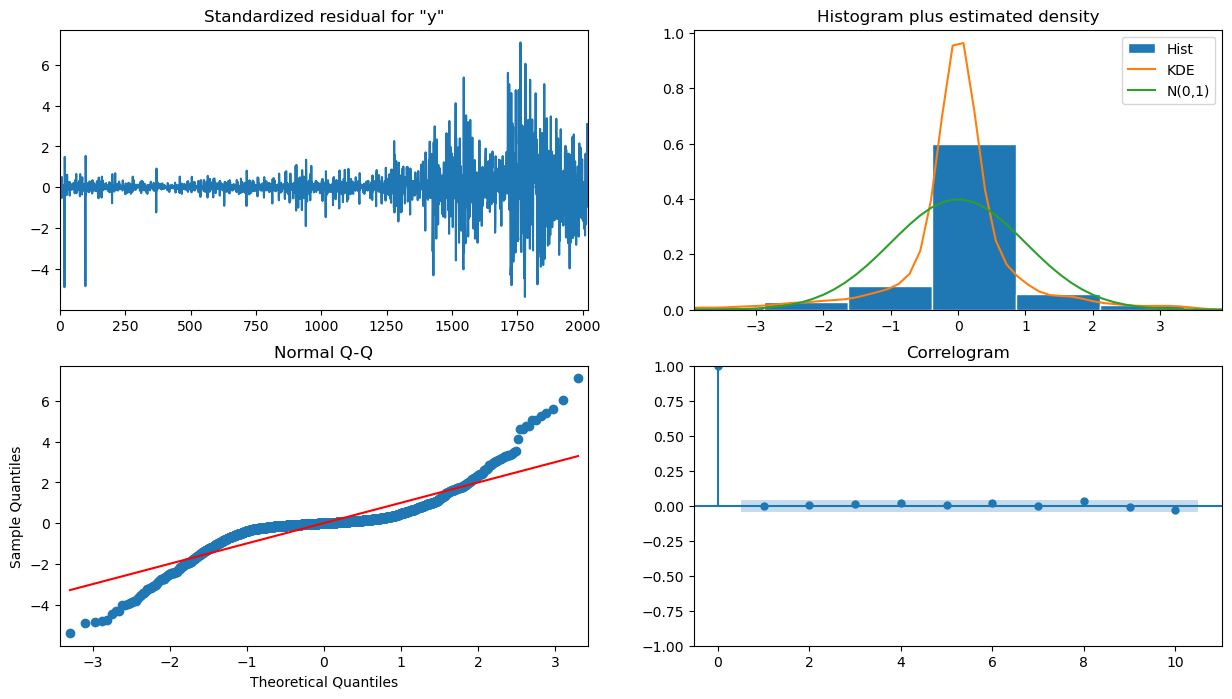

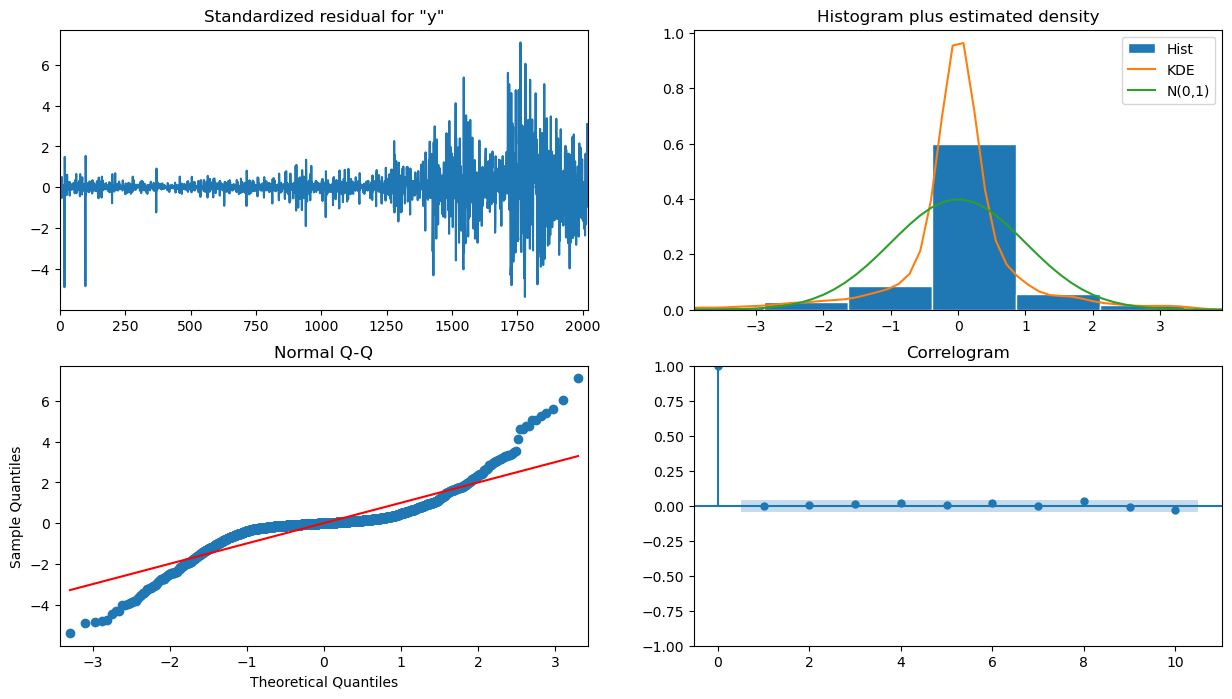

In [114]:
arima_model = SARIMAX(train, order=(3,1,6), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [115]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1    0.016728   0.897093
2    0.030210   0.985008
3    0.150691   0.985127
4    0.463109   0.976991
5    0.532994   0.990865
6    0.879307   0.989777
7    0.884328   0.996485
8    2.826626   0.944762
9    3.085223   0.960820
10   4.080029   0.943665
11   4.597374   0.949089
12   4.597428   0.970093
13   4.713884   0.980963
14   8.936766   0.835080
15   9.372144   0.857269
16   9.428493   0.894724
17   9.445066   0.925257
18  13.569591   0.756687
19  16.649915   0.613572


The ARIMA Model (3,1,1) seems fairly good, the residuals are correlated to white noise.

The ARIMA Model (3,1,6) seems fairly good as well.

# Forecasting

In [116]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(3, 1, 6))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

In [117]:
copy_data

array([[-1.81421451],
       [-1.81890339],
       [-1.82774402],
       ...,
       [ 3.30795772],
       [ 3.18692105],
       [ 3.14162537]])

# Predicting the next year stock prices of Tesla Stock - From 2023-1-16 to 2024-1-16

In [118]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_arima = rolling_forecast(copy_data, TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

In [119]:
predicted_data = pd.DataFrame({'Actual Data': data['Close'][-251:]})
predicted_data.head()

,Actual Data
Date,
2023-01-17,131.490005
2023-01-18,128.779999
2023-01-19,127.169998
2023-01-20,133.419998
2023-01-23,143.750000


In [120]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
Date,,
2023-01-17,131.490005,1.075208
2023-01-18,128.779999,1.253494
2023-01-19,127.169998,1.266521
2023-01-20,133.419998,1.154569
2023-01-23,143.750000,1.260462


In [121]:
pred_arima = np.array(pred_arima)
pred_arima = pred_arima.reshape(-1,1)

In [122]:
pred_arima = np.dot(pred_arima, pca.components_)
pred_arima = scaler.inverse_transform(pred_arima)

In [123]:
pred_arima

array([[1.37342724e+03, 1.49904773e+02, 1.53218990e+02, ...,
        1.49060933e+02, 1.45167692e+02, 1.69995370e-03],
       [1.41271358e+03, 1.57600470e+02, 1.61086526e+02, ...,
        1.56652773e+02, 1.52255155e+02, 1.67971947e-03],
       [1.41558399e+03, 1.58162747e+02, 1.61661359e+02, ...,
        1.57207462e+02, 1.52772993e+02, 1.67824108e-03],
       ...,
       [1.88125603e+03, 2.49381998e+02, 2.54917479e+02, ...,
        2.47195671e+02, 2.36782686e+02, 1.43839909e-03],
       [1.85860998e+03, 2.44945924e+02, 2.50382350e+02, ...,
        2.42819463e+02, 2.32697219e+02, 1.45006282e-03],
       [1.83023946e+03, 2.39388499e+02, 2.44700832e+02, ...,
        2.37337039e+02, 2.27579028e+02, 1.46467491e-03]])

In [124]:
predicted_data['Predicted Data'] = pred_arima

In [125]:
predicted_data.head(20)

,Actual Data,Predicted Data
Date,,
2023-01-17,131.490005,1373.427238
2023-01-18,128.779999,1412.713578
2023-01-19,127.169998,1415.583992
2023-01-20,133.419998,1390.914809
2023-01-23,143.750000,1414.249016
2023-01-24,143.889999,1435.237916
2023-01-25,144.429993,1450.052940
2023-01-26,160.270004,1442.664049
2023-01-27,177.899994,1506.219281


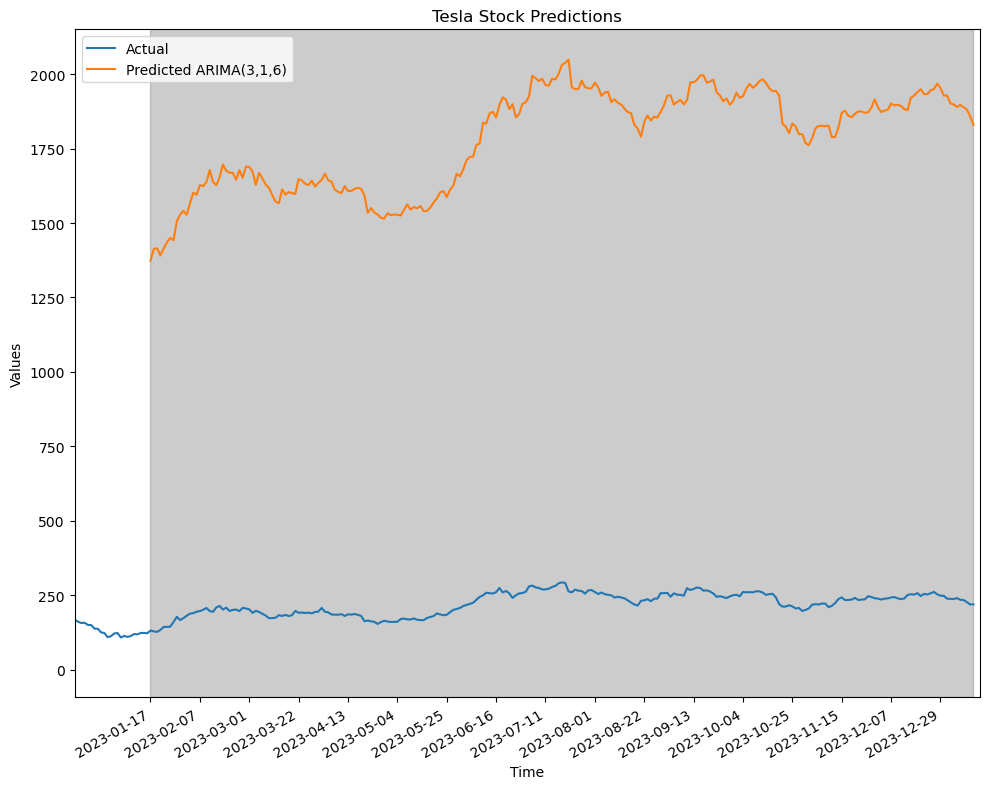

In [131]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Close'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(3,1,6)')
ax.set_title('Tesla Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(2000, 2275)
ax.axvspan(2023, 2273, color="#808080", alpha=0.4)
pt.xticks(np.arange(2023, 2273,15))
fig.autofmt_xdate()
pt.tight_layout()

In [132]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2446478.7947416073


In [133]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1558.6847530917516


In [134]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 27512.540256833774


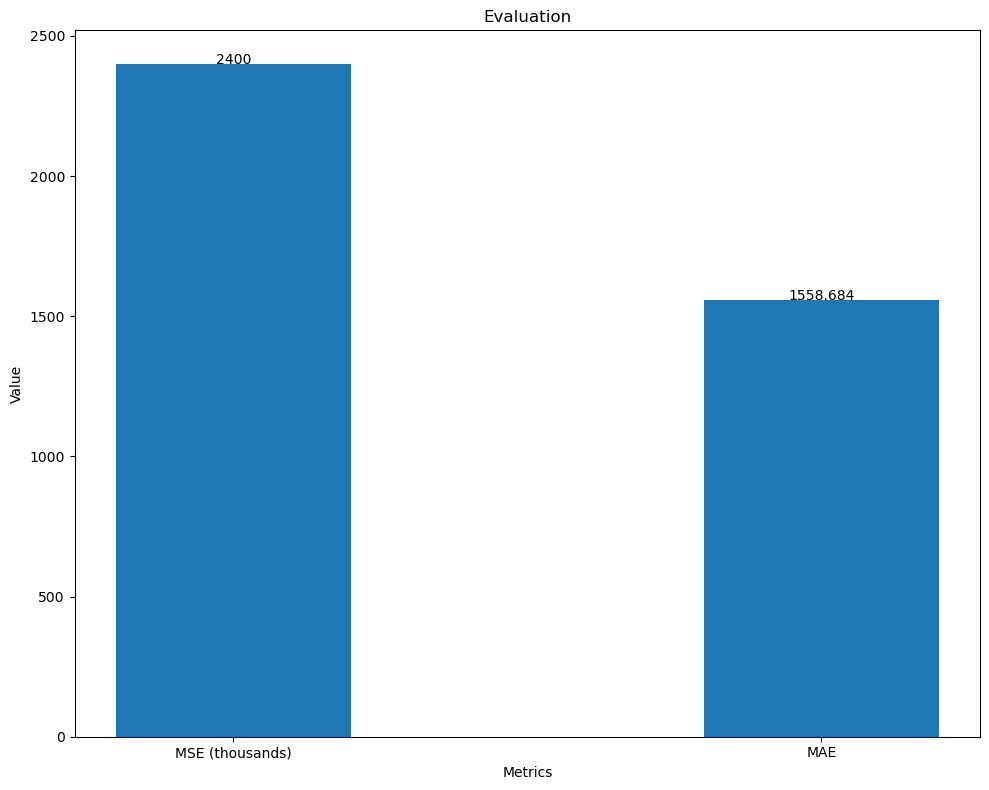

In [136]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE (thousands)', 'MAE']
y = [2400, 1558.684]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

The performance of this model is poor. This might due to 2 reasons:
- The time series has very high volatility as we can see from the data whereas ARIMA could not predict well
- Scaling and PCA-ing our data caused this to happen because we fill in the missing values with mean in SimpleImputer

Let's try predicting without doing any feature engineering 